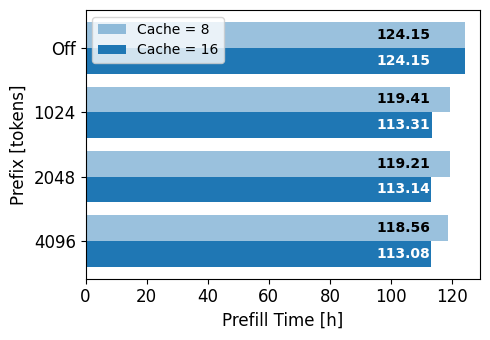

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
prefix_sizes     = ["Off", 1024, 2048, 4096]        # tokens
prefill_8h       = [124.15, 119.41, 119.21, 118.56] # cache = 8
prefill_16h      = [124.15, 113.31, 113.14, 113.08] # cache = 16

# Plot settings
bar_h      = 0.40                      # bar thickness
y_pos      = np.arange(len(prefix_sizes))
label_x    = max(prefill_8h + prefill_16h) + 1  # common label column

plt.figure(figsize=(5, 3.5))

# Bars
bars_8  = plt.barh(y_pos - bar_h/2, prefill_8h,  bar_h,
                   color=plt.cm.tab10(0), alpha=0.45, label="Cache = 8")
bars_16 = plt.barh(y_pos + bar_h/2, prefill_16h, bar_h,
                   color=plt.cm.tab10(0), alpha=1.00, label="Cache = 16")

# Value labels
for bars, vals, txt_color in [(bars_8, prefill_8h, "black"),
                              (bars_16, prefill_16h, "white")]:
    for bar, val in zip(bars, vals):
        plt.text(label_x - 30, bar.get_y() + bar.get_height()/2,
                 f"{val:.2f}", va="center", ha="left",
                 fontweight="bold", color=txt_color)

# Axes & style
plt.yticks(y_pos, [str(s) for s in prefix_sizes])
plt.xlabel("Prefill Time [h]", fontsize=12)
plt.ylabel("Prefix [tokens]", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title("Prefill Time vs Prefix Matching Size\nCache Sizes: 8 vs 16 Prompts", fontsize=14)
plt.xlim(0, label_x + 4)
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()

plt.savefig("figures/prefill_time_vs_prefix_matching_size.pdf", dpi=300, bbox_inches='tight')


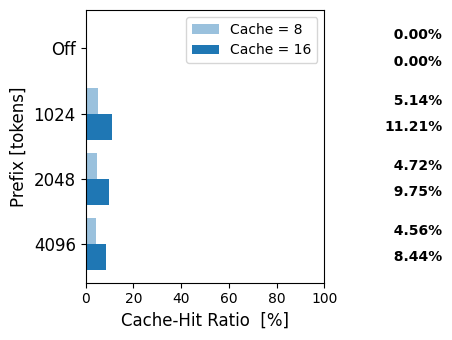

In [2]:
import matplotlib.pyplot as plt
import numpy as np

prefix_sizes   = ["Off", 1024, 2048, 4096]
hit_8          = [0.00,  5.14,  4.72,  4.56]
hit_16         = [0.00, 11.21,  9.75,  8.44]

bar_h   = 0.40
y_pos   = np.arange(len(prefix_sizes))

plt.figure(figsize=(5, 3.5))

bars_8  = plt.barh(y_pos - bar_h/2, hit_8,  bar_h,
                   color=plt.cm.tab10(0), alpha=0.45, label="Cache = 8")
bars_16 = plt.barh(y_pos + bar_h/2, hit_16, bar_h,
                   color=plt.cm.tab10(0), alpha=1.00, label="Cache = 16")

for bars, vals, txt_color in [
        (bars_8,  hit_8,  "black"),
        (bars_16, hit_16, "black")]:
    for bar, val in zip(bars, vals):
        plt.text(label_x, bar.get_y() + bar.get_height()/2,
                 f"{val:.2f}%" if val > 10 else f"  {val:.2f}%", va="center", ha="left",
                 fontweight="bold", color=txt_color, fontsize=10)

plt.yticks(y_pos, [str(s) for s in prefix_sizes], fontsize=12)
plt.xlabel("Cache-Hit Ratio  [%]", fontsize=12)
plt.ylabel("Prefix [tokens]", fontsize=12)
plt.xlim(0, 100)
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()

plt.savefig("figures/hit_ratio_vs_prefix_matching_size.pdf", dpi=300, bbox_inches="tight")


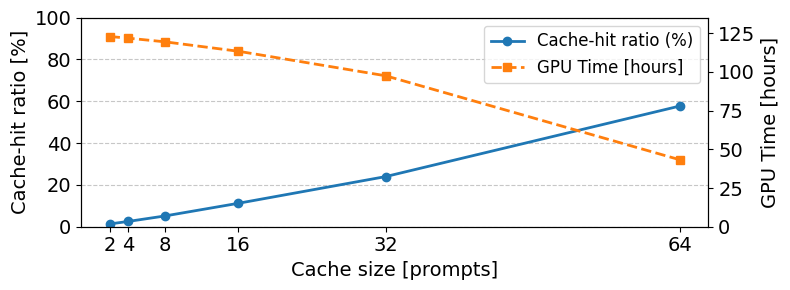

In [3]:
import matplotlib.pyplot as plt

CACHE_SIZE        = [2, 4, 8, 16, 32, 64]                   # prompts
CACHE_HIT_RATIOS  = [1.32, 2.52, 5.14, 11.21, 23.96, 57.70] # %
GPU_HOURS         = [122.83, 121.78, 119.41, 113.31, 97.48, 43.21]

fig, ax1 = plt.subplots(figsize=(8, 3))

ln1 = ax1.plot(
    CACHE_SIZE, CACHE_HIT_RATIOS, marker='o', label="Cache-hit ratio (%)",
    color='tab:blue', linestyle='-', linewidth=2
)
ax1.set_xlabel("Cache size [prompts]", fontsize=14)
ax1.set_ylabel("Cache-hit ratio [%]",  fontsize=14)
ax1.set_ylim(0, 100)
ax1.grid(axis="y", linestyle="--", alpha=0.7)
ax1.tick_params(axis='both', labelsize=14)

ax2 = ax1.twinx()
ln2 = ax2.plot(
    CACHE_SIZE, GPU_HOURS, marker='s', linestyle='--', label="GPU Time [hours]",
    color='tab:orange', linewidth=2
)
ax2.set_ylabel("GPU Time [hours]", fontsize=14)
ax2.set_ylim(0, max(GPU_HOURS) * 1.1)
ax2.tick_params(axis='y', labelsize=14)

plt.xticks(CACHE_SIZE, fontsize=14)
plt.yticks([125, 100, 75, 50, 25, 0], fontsize=14)

lines  = ln1 + ln2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize=12, loc="upper right")

plt.tight_layout()
plt.savefig("figures/hit_ratio_vs_cache_size.pdf", dpi=300, bbox_inches="tight")
